# Devices Price Classification System
- objective: building an ML model to predict or classify the price for any device.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


### Data Dictionary:
- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has Bluetooth or not **(Categorical)**
- clock_speed - The speed at which the microprocessor executes instructions
- dual_sim - Has dual sim support or not **(Categorical)**
- fc - Front Camera megapixels
- four_g - Has 4G or not **(Categorical)**
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of the processor
- pc - Primary Camera megapixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Megabytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - longest time that a single battery charge will last when you are
- three_g - Has 3G or not **(Categorical)**
- touch_screen - Has touch screen or not **(Categorical)**
- wifi - Has wifi or not **(Categorical)**
- price_range - This is the target variable with the value of: 0 (low cost), 1 (medium cost), 2 (high cost), 3 (very high cost)

## Preprocessing and EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- We'll have to deal with the null values. we'll probably drop them.

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


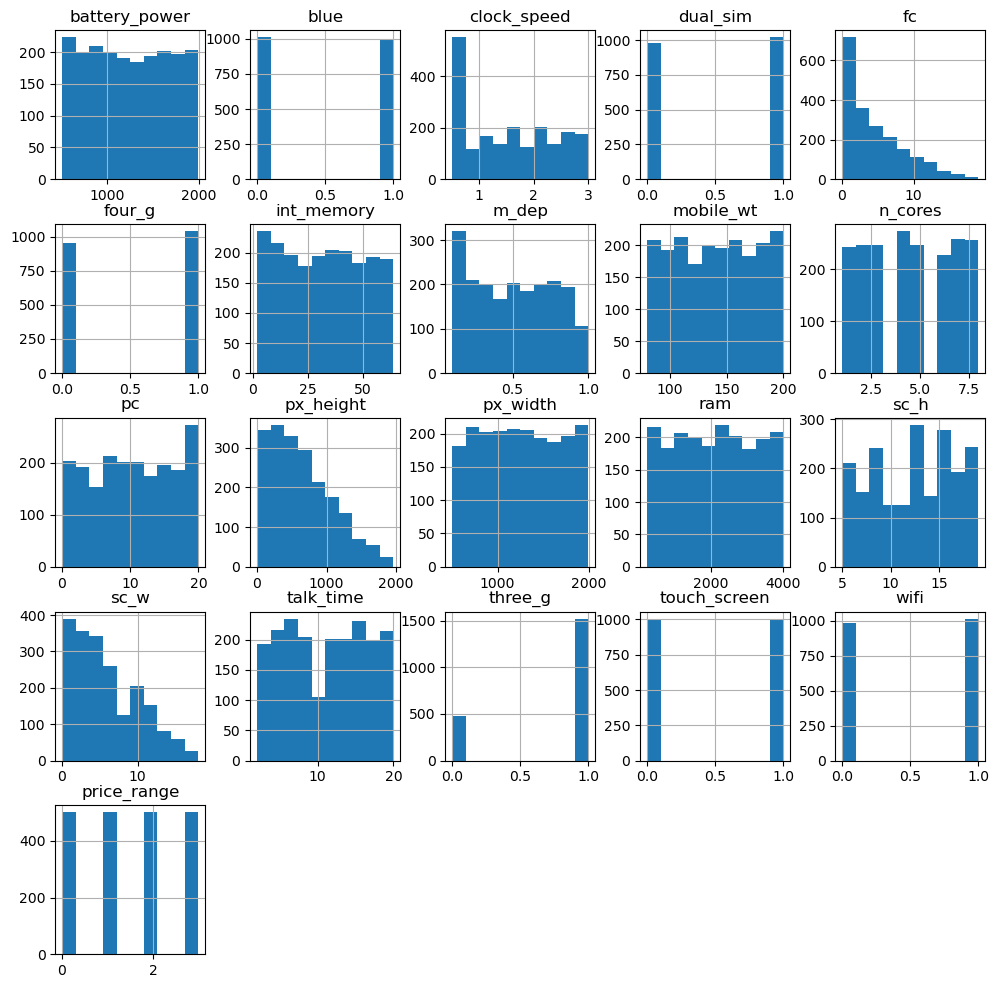

In [6]:
data.hist(figsize=(12,12));

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


- For more efficient analysis, we'll split the data feautures; categorical and numerical, and work on each seperately to get a better sense of the data.
- we'll include the target column in each.

In [8]:
cat_features = ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range'] 

cat_df = data[cat_features]

In [9]:
cat_df.head(3)

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0.0,0,0,1,1
1,1,1,1.0,1,1,0,2
2,1,1,1.0,1,1,0,2


In [10]:
num_df = data.drop(columns=cat_features)
num_df.head(2)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19
1,1021,0.5,0.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7


In [11]:
# Adding the target feature to the numerical df
num_df['price_range'] = data['price_range']
num_df.head(2)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,1
1,1021,0.5,0.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,2


#### Categorical df

In [12]:
cat_df.head(2)

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0.0,0,0,1,1
1,1,1,1.0,1,1,0,2


In [13]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue          2000 non-null   int64  
 1   dual_sim      2000 non-null   int64  
 2   four_g        1995 non-null   float64
 3   three_g       2000 non-null   int64  
 4   touch_screen  2000 non-null   int64  
 5   wifi          2000 non-null   int64  
 6   price_range   2000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 109.5 KB


In [14]:
cat_df['four_g'].value_counts()

four_g
1.0    1040
0.0     955
Name: count, dtype: int64

In [15]:
data[data['four_g'].isnull()==True]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


- Well, most of these records are missing, so drooping them seems to be the right approach.

In [16]:
cat_df = cat_df.dropna()
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue          1995 non-null   int64  
 1   dual_sim      1995 non-null   int64  
 2   four_g        1995 non-null   float64
 3   three_g       1995 non-null   int64  
 4   touch_screen  1995 non-null   int64  
 5   wifi          1995 non-null   int64  
 6   price_range   1995 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 124.7 KB


In [17]:
#blue
cat_df.groupby('price_range').count()

,blue,dual_sim,four_g,three_g,touch_screen,wifi
price_range,,,,,,
0,499,499,499,499,499,499
1,498,498,498,498,498,498
2,500,500,500,500,500,500
3,498,498,498,498,498,498


- These features look perfectly balanced with the target price range.

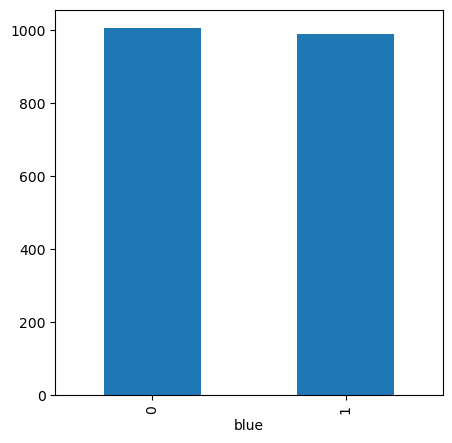

In [18]:
#Blutooth
cat_df['blue'].value_counts().plot(kind='bar', figsize=(5,5));

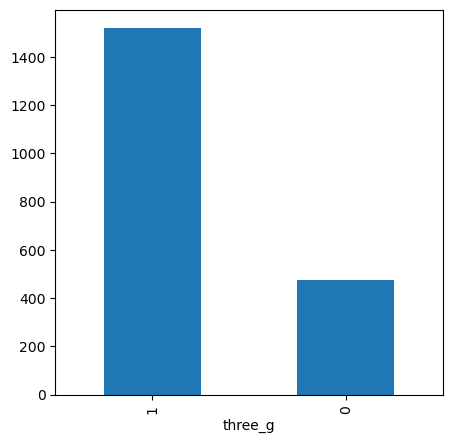

In [19]:
# Exploring 3G and 4G
cat_df['three_g'].value_counts().plot(kind='bar', figsize=(5,5));

In [20]:
cat_df.groupby(['price_range', 'three_g']).count()

blue  dual_sim  four_g  touch_screen  wifi
price_range three_g                                            
0           0         127       127     127           127   127
            1         372       372     372           372   372
1           0         122       122     122           122   122
            1         376       376     376           376   376
2           0         113       113     113           113   113
            1         387       387     387           387   387
3           0         114       114     114           114   114
            1         384       384     384           384   384

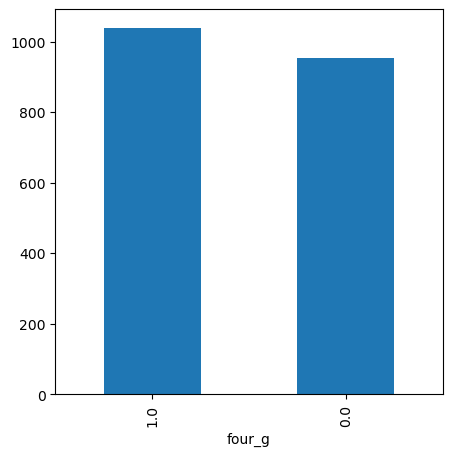

In [21]:
cat_df['four_g'].value_counts().plot(kind='bar', figsize=(5,5));

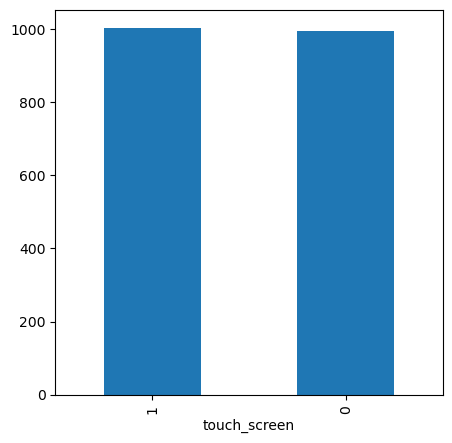

In [22]:
# touch screen
cat_df['touch_screen'].value_counts().plot(kind='bar', figsize=(5,5));

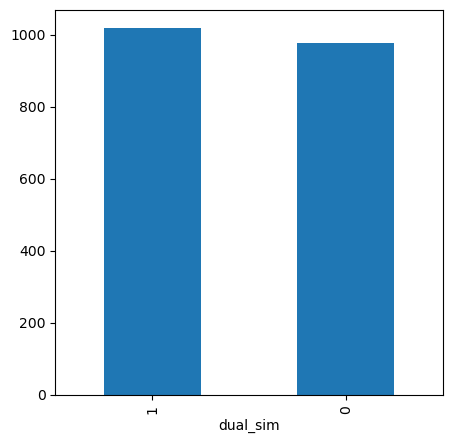

In [23]:
#dual sim
cat_df['dual_sim'].value_counts().plot(kind='bar', figsize=(5,5));

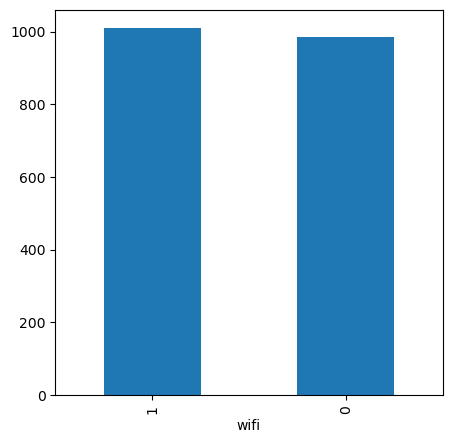

In [24]:
# wifi
cat_df['wifi'].value_counts().plot(kind='bar', figsize=(5,5));

- It seems that the data is more or less balanced for all categorical features, except for 3G; we have more phones that support 3G.

#### Numerical df

In [25]:
num_df.head(3)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,1
1,1021,0.5,0.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,2
2,563,0.5,2.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,2


In [26]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             1995 non-null   float64
 3   int_memory     1995 non-null   float64
 4   m_dep          1995 non-null   float64
 5   mobile_wt      1996 non-null   float64
 6   n_cores        1996 non-null   float64
 7   pc             1995 non-null   float64
 8   px_height      1996 non-null   float64
 9   px_width       1998 non-null   float64
 10  ram            1998 non-null   float64
 11  sc_h           1999 non-null   float64
 12  sc_w           1999 non-null   float64
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 234.5 KB


In [27]:
data[data['fc'].isnull()==True]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


- Same here, we'll drop the null records.

In [28]:
num_df = num_df.dropna()

In [29]:
num_df.isnull().sum().sum()

0

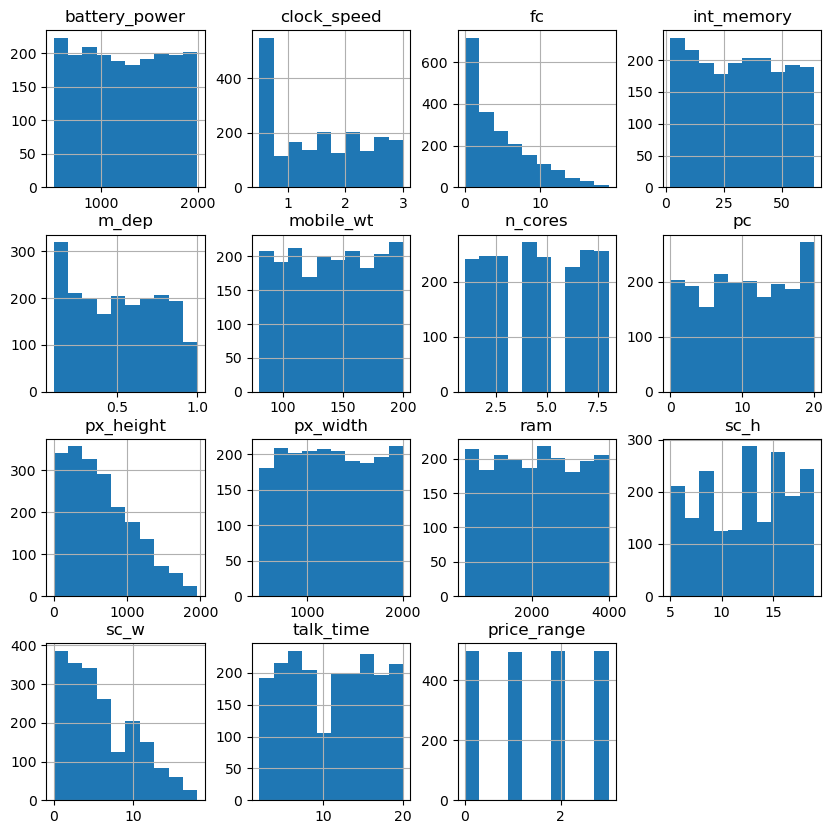

In [30]:
num_df.hist(figsize=(10,10));

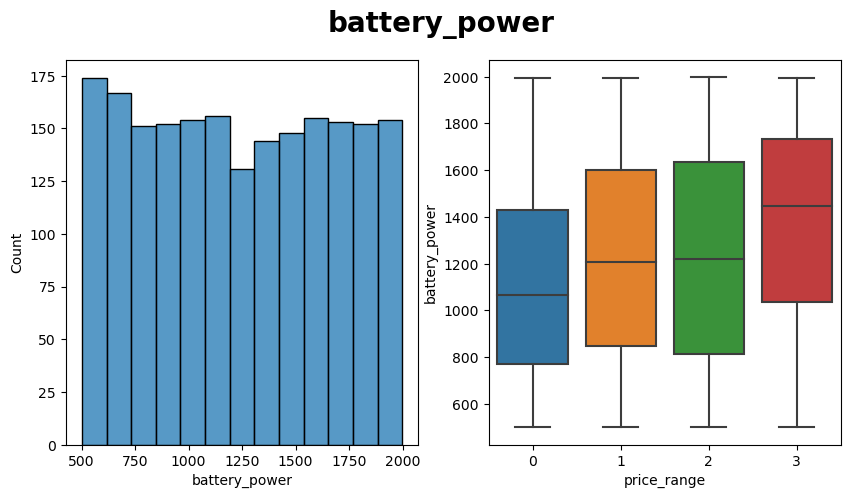

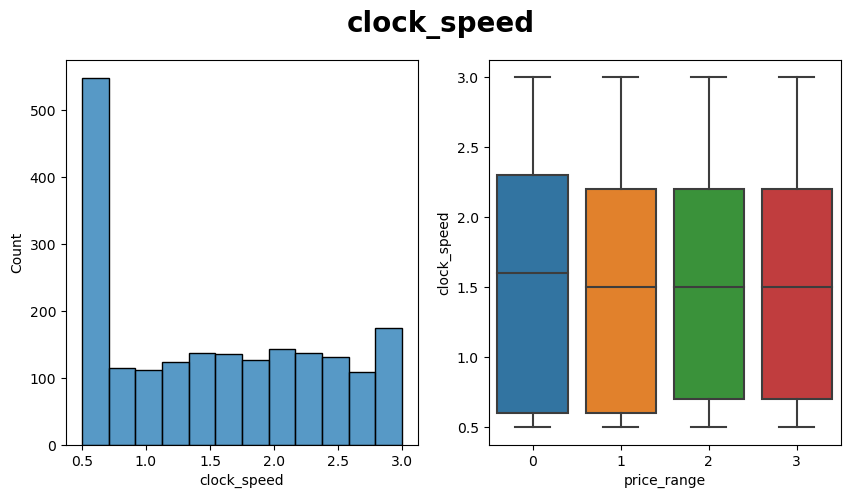

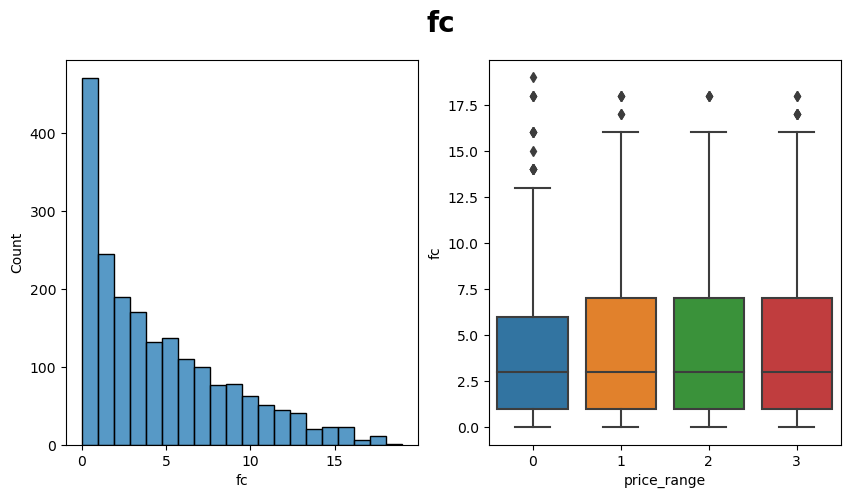

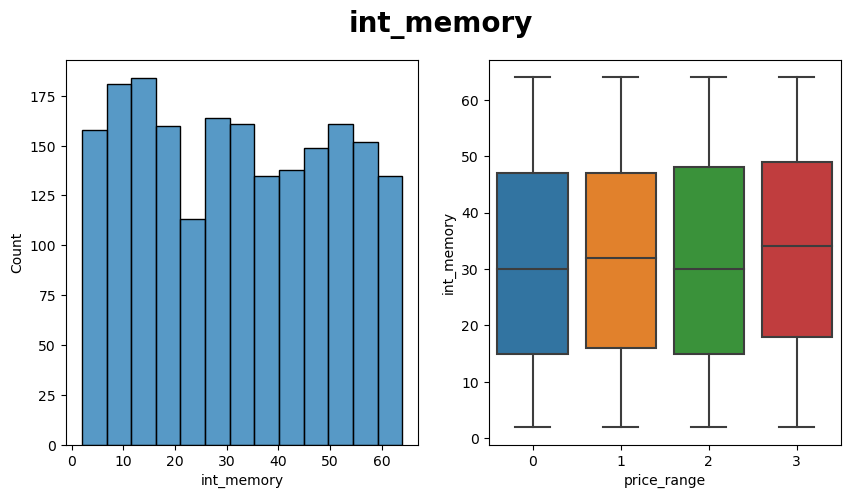

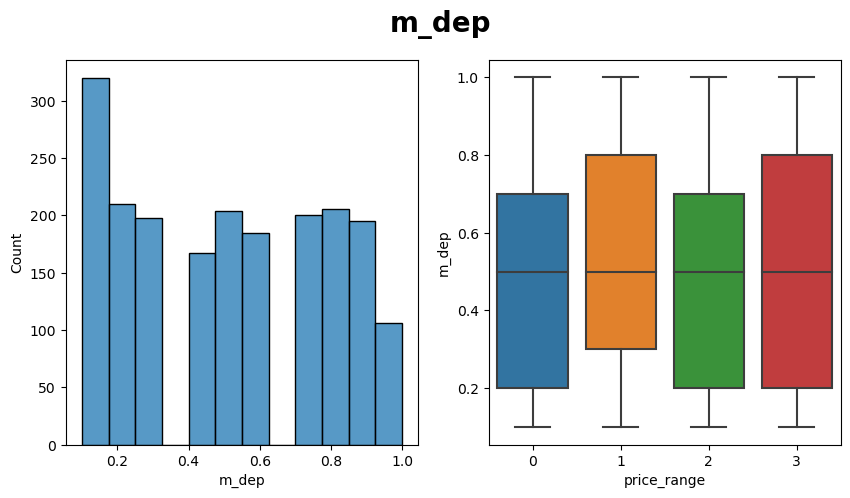

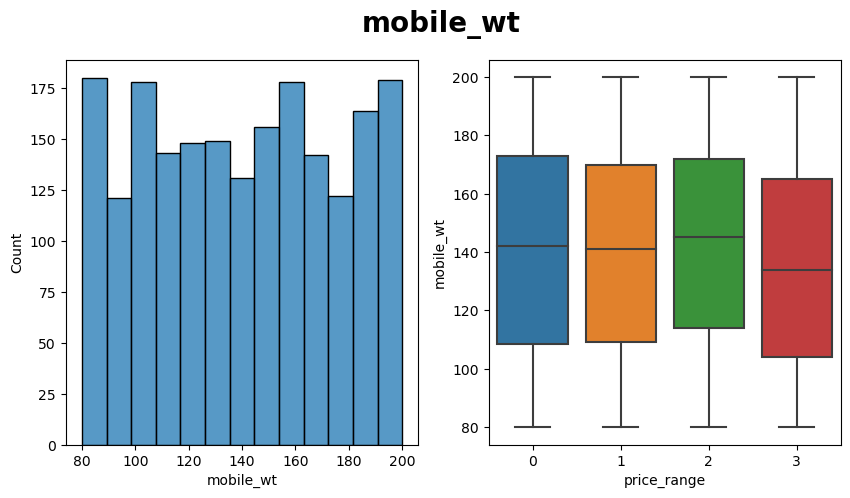

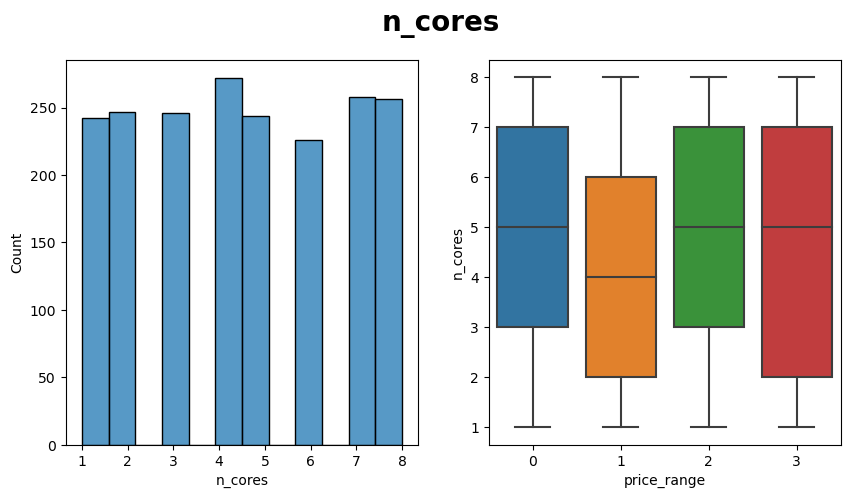

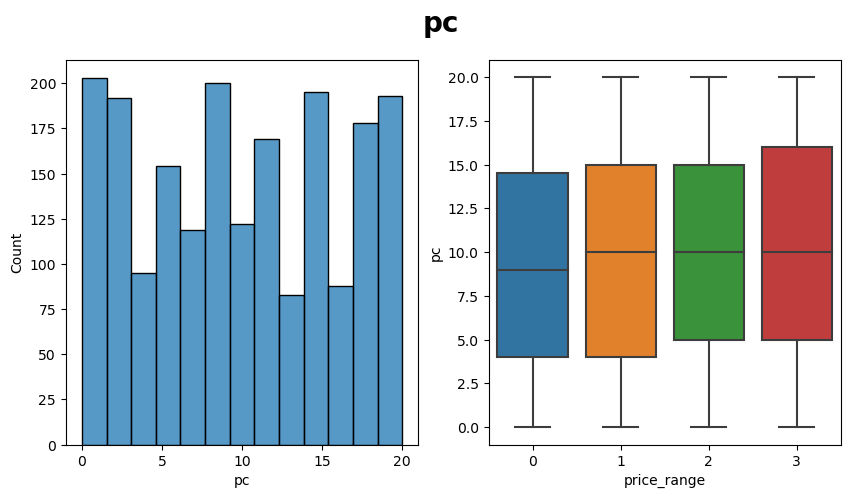

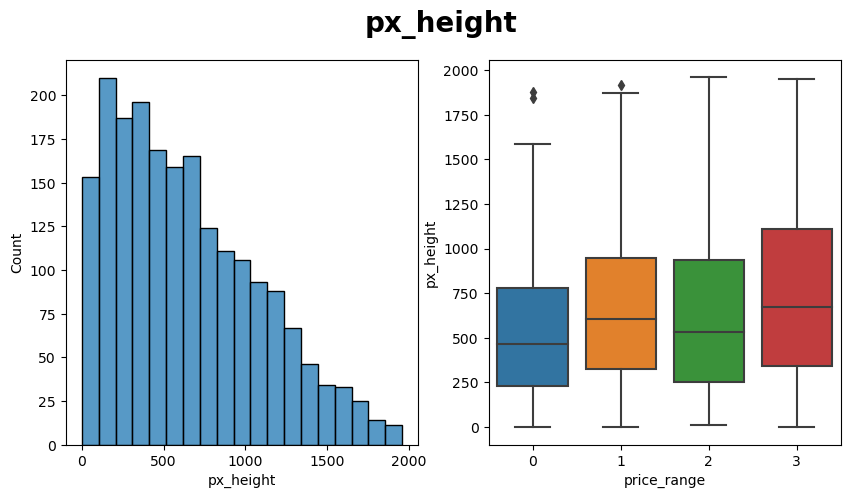

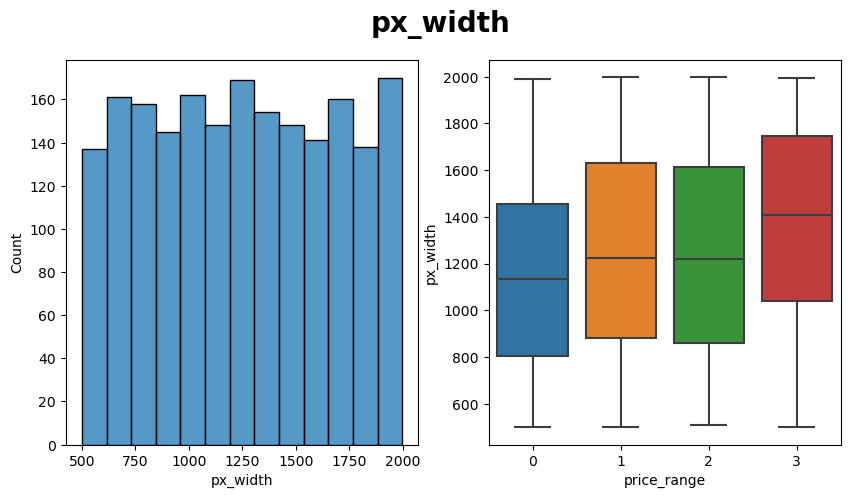

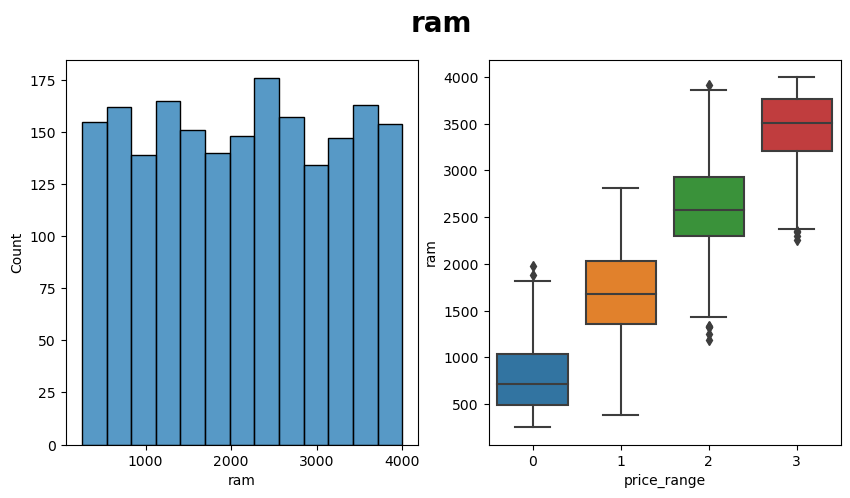

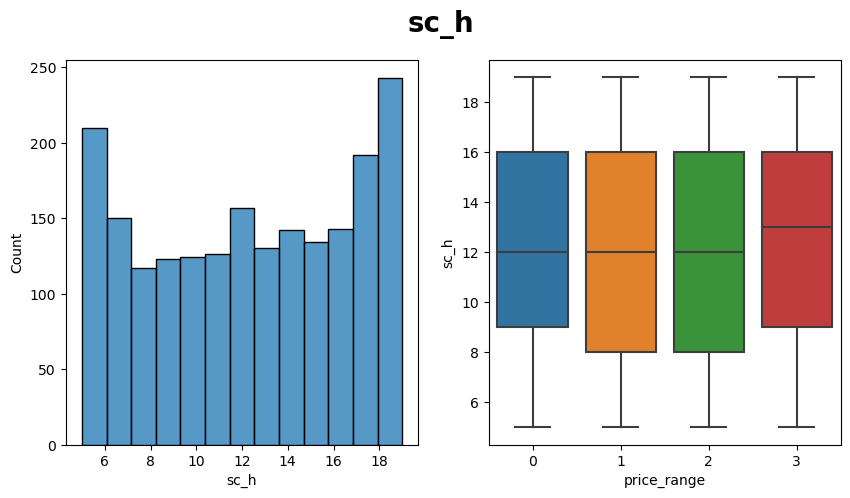

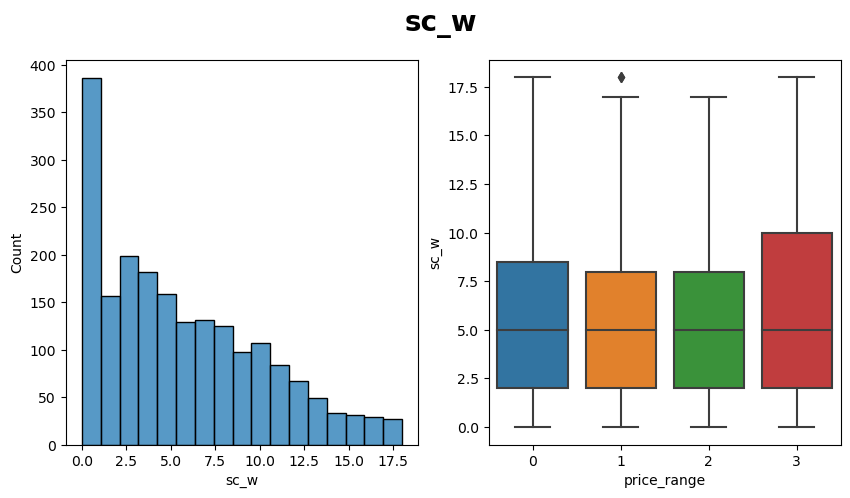

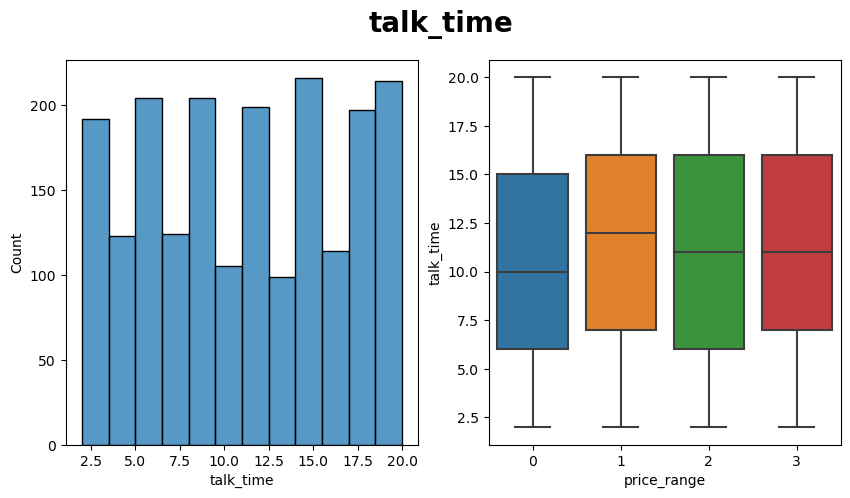

In [31]:
for col in num_df.columns[:-1] :
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    plt.suptitle(col, fontsize=20, fontweight='bold')
    ax0 = sns.histplot(x=col, data=num_df, ax=ax[0], )
    ax1 = sns.boxplot(x='price_range', y=col, data=num_df, ax=ax[1])

- Right off the bat, it seems that **ram** has a strong correlation with the price
- The front camera **fc** seems to have a couple of outliers, especially in the first (lowest) price range.

In [32]:
num_df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,1.522451,4.307885,32.074335,0.502009,140.263184,4.516323,9.909091,644.800603,1251.115520,2123.632848,12.307885,5.774485,11.001507,1.499247
std,439.641057,0.815499,4.339735,18.138177,0.288622,35.398777,2.291257,6.061019,442.951035,431.924893,1085.051293,4.213061,4.357385,5.464872,1.118539
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.500000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000,0.000000
50%,1225.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,2.000000
75%,1615.500000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000,2.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


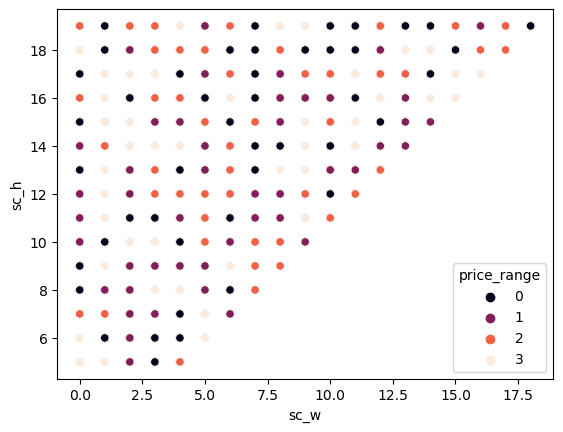

In [33]:
sns.scatterplot(x='sc_w', y='sc_h', data=num_df, hue='price_range', palette='rocket');

- Not much intuition we can build from this scatter..

In [34]:
num_df.corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.013228,0.033141,-0.004863,0.031583,0.000248,-0.029953,0.029965,0.012494,-0.010127,-0.001069,-0.031107,-0.022805,0.050669,0.199277
clock_speed,0.013228,1.000000,0.002249,0.008581,-0.013557,0.012485,-0.005830,-0.001630,-0.017501,-0.012730,0.002934,-0.030373,-0.007526,-0.011362,-0.006675
fc,0.033141,0.002249,1.000000,-0.026542,-0.001497,0.024745,-0.014378,0.644641,-0.010548,-0.002789,0.018691,-0.011399,-0.012111,-0.006016,0.024738
int_memory,-0.004863,0.008581,-0.026542,1.000000,0.005232,-0.035050,-0.026921,-0.032557,0.012372,-0.008668,0.029840,0.039254,0.011409,-0.003210,0.041812
m_dep,0.031583,-0.013557,-0.001497,0.005232,1.000000,0.021447,-0.002861,0.025584,0.023440,0.021301,-0.010281,-0.026461,-0.020337,0.016692,-0.001396
mobile_wt,0.000248,0.012485,0.024745,-0.035050,0.021447,1.000000,-0.019204,0.020420,-0.000562,0.000098,-0.004048,-0.036263,-0.020188,0.003889,-0.032168
n_cores,-0.029953,-0.005830,-0.014378,-0.026921,-0.002861,-0.019204,1.000000,-0.002589,-0.008214,0.024549,0.005224,-0.000755,0.026164,0.012299,0.004662
pc,0.029965,-0.001630,0.644641,-0.032557,0.025584,0.020420,-0.002589,1.000000,-0.018385,0.005861,0.031125,0.005190,-0.025988,0.014993,0.034716
px_height,0.012494,-0.017501,-0.010548,0.012372,0.023440,-0.000562,-0.008214,-0.018385,1.000000,0.509599,-0.019973,0.057761,0.042126,-0.013560,0.147956
px_width,-0.010127,-0.012730,-0.002789,-0.008668,0.021301,0.000098,0.024549,0.005861,0.509599,1.000000,0.002141,0.019890,0.033736,0.005866,0.163319


- Probably a heatmap would give us more insights.

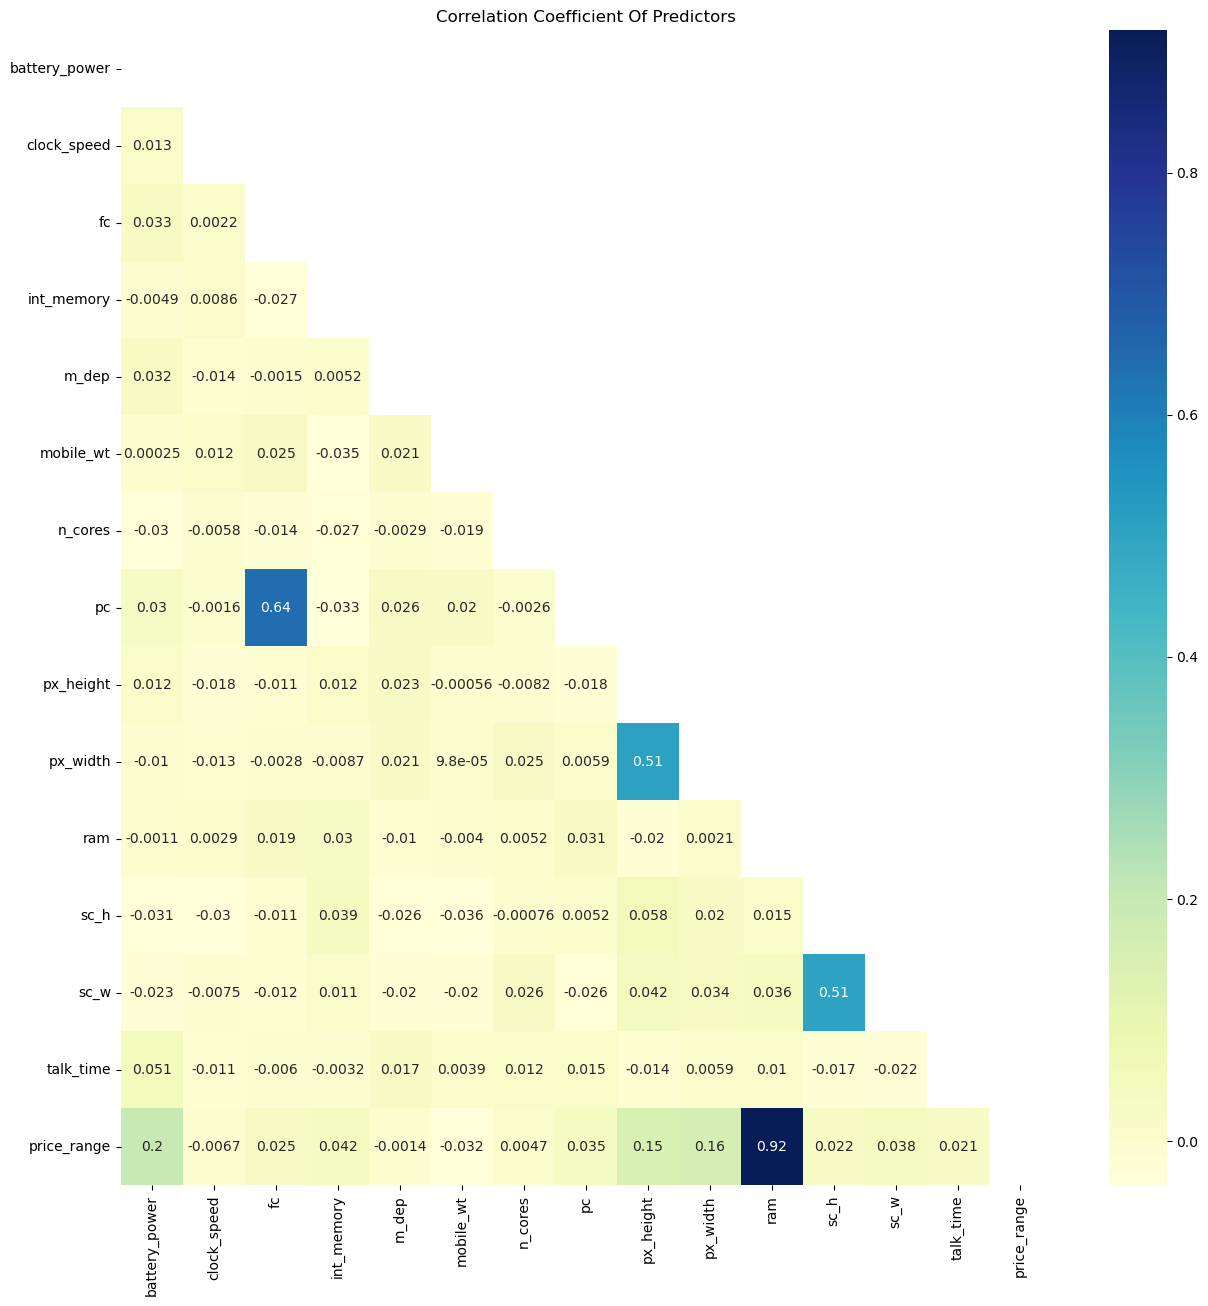

In [35]:
mask = np.triu(np.ones_like(num_df.corr())) # creating a mask to show the lower triangle of the heatmap only
plt.figure(figsize=(15,15)) 
dataplot = sns.heatmap(num_df.corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.title('Correlation Coefficient Of Predictors')
plt.show()

- The strongest correlation seems to be between ram and the price range, it's intuitive to think so.
- Also there's a correlation between screen width and screen hight, which is again; intuitive. and similarily between front camera and back camera.

<Axes: xlabel='ram', ylabel='price_range'>

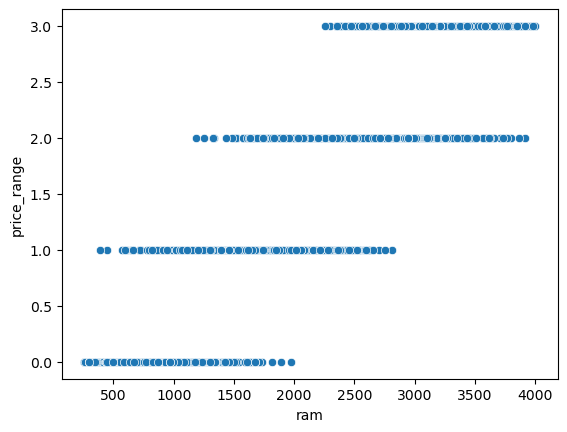

In [36]:
sns.scatterplot(x='ram', y='price_range', data=num_df)

<Axes: xlabel='clock_speed', ylabel='price_range'>

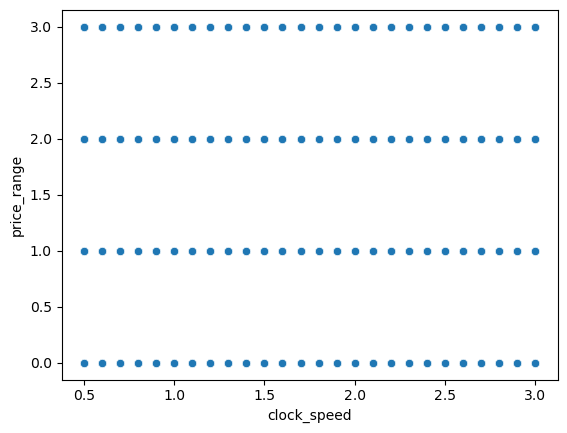

In [37]:
sns.scatterplot(x='clock_speed', y='price_range', data=num_df)

In [38]:
num_df['clock_speed'].value_counts()

clock_speed
0.5    410
2.8     84
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     64
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.8     58
0.9     57
2.4     57
1.2     56
2.6     55
2.7     54
1.1     50
3.0     28
Name: count, dtype: int64

- We probably need to standardize the numeric features.

In [39]:
# combining the two df

df = pd.concat([cat_df.drop('price_range', axis=1), num_df], axis=1)

In [40]:
df.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,clock_speed,fc,int_memory,...,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,0,0,0.0,0,0,1,842.0,2.2,1.0,7.0,...,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,1.0
1,1,1,1.0,1,1,0,1021.0,0.5,0.0,53.0,...,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,2.0
2,1,1,1.0,1,1,0,563.0,0.5,2.0,41.0,...,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,2.0
3,1,0,0.0,1,0,0,615.0,2.5,0.0,10.0,...,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,2.0
4,1,0,1.0,1,1,0,1821.0,1.2,13.0,44.0,...,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   blue           1995 non-null   int64  
 1   dual_sim       1995 non-null   int64  
 2   four_g         1995 non-null   float64
 3   three_g        1995 non-null   int64  
 4   touch_screen   1995 non-null   int64  
 5   wifi           1995 non-null   int64  
 6   battery_power  1991 non-null   float64
 7   clock_speed    1991 non-null   float64
 8   fc             1991 non-null   float64
 9   int_memory     1991 non-null   float64
 10  m_dep          1991 non-null   float64
 11  mobile_wt      1991 non-null   float64
 12  n_cores        1991 non-null   float64
 13  pc             1991 non-null   float64
 14  px_height      1991 non-null   float64
 15  px_width       1991 non-null   float64
 16  ram            1991 non-null   float64
 17  sc_h           1991 non-null   float64
 18  sc_w         

In [42]:
# Dropping the null values
df = df.dropna()
df.isnull().sum().sum()

0

In [43]:
#checing if the target is balanced
df['price_range'].value_counts()

price_range
2.0    499
0.0    499
3.0    497
1.0    496
Name: count, dtype: int64

###### Checking the test data

In [44]:
test_data = pd.read_csv('test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [45]:
test_data.isnull().sum().sum()

0

In [46]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [47]:
data.drop('price_range', axis=1).columns == test_data.drop('id', axis=1).columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

- Feauters of the test data are the same as the train data, except for the price_range and id.
- We'll drop id column.

In [48]:
test_df = test_data.drop('id', axis=1)
test_df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0


## Splitting and Training

In [49]:
num_df.columns.values

array(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'price_range'], dtype=object)

In [50]:
columns_to_scale = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep','mobile_wt', 'n_cores', 
                    'pc', 'px_height', 'px_width', 'ram','sc_h', 'sc_w', 'talk_time']

In [51]:
X = df.drop('price_range',axis=1)
X.head(1)

,blue,dual_sim,four_g,three_g,touch_screen,wifi,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,0,0.0,0,0,1,842.0,2.2,1.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0


In [52]:
y = df['price_range']
y

0       1.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
1995    0.0
1996    2.0
1997    3.0
1998    0.0
1999    3.0
Name: price_range, Length: 1991, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


scale_transformer = ColumnTransformer(transformers=[('num', StandardScaler(), columns_to_scale)],
                       remainder='passthrough')

X_train_scaled = scale_transformer.fit_transform(X_train)
X_val_scaled = scale_transformer.transform(X_val)
X_test_scaled = scale_transformer.transform(test_df)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [56]:
y_train_pred_lr = lr_model.predict(X_train_scaled)

In [57]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def get_acc_scores(y, y_pred):
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    return acc, precision, recall, f1

def print_scores(acc, prec, rec, f1):
    print('Accuracy score: ', acc)
    print('Precision score: ', prec) 
    print('Recall score: ', recall)
    print('F1 score: ', f1)

In [58]:
accuracy, precision, recall, f1 = get_acc_scores(y_train, y_train_pred_lr)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9748743718592965
Precision score:  0.9748952642725448
Recall score:  0.9748779930881895
F1 score:  0.9748646122120119


In [59]:
scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring="accuracy")
print('CV scores: ', scores)
print('Average accuracy of CV: ', np.mean(scores))

CV scores:  [0.94984326 0.94670846 0.94968553 0.95597484 0.96226415]
Average accuracy of CV:  0.9528952504879638


In [60]:
confusion_matrix(y_train, y_train_pred_lr)


array([[388,   5,   0,   0],
       [  7, 393,   7,   0],
       [  0,   9, 375,   8],
       [  0,   0,   4, 396]], dtype=int64)

- It seems that simple LogisticRegression is performing well on the data,  the cv performance is not drastically different from the accuracy on the train data.
- Since that The diagonal of the Confusion Matrix elements represent the counts of correctly classified records for each class, it seems that the LR model correctly classified most of the training data. However, it's not the whole picture.

In [61]:
y_val_pred_lr = lr_model.predict(X_val_scaled)

In [62]:
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_lr)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9598997493734336
Precision score:  0.9590808062355376
Recall score:  0.9606513340494476
F1 score:  0.9596037466895603


- The scores on the validation data are quite good.
- The F1 score on the train set is 97.4% and on the validation set 96%

### SVC

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_model = SVC()
svc_param = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

svc_grid = GridSearchCV(svc_model, param_grid=svc_param, scoring='accuracy', cv=5, verbose=3)
svc_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.937 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.937 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.925 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.937 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.937 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.674 total time=   0.1s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.712 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.730 total time=   0.1s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.717 total time=   0.1s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.492 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [64]:
svc_grid.best_score_

0.9654600658504368

In [65]:
svc_grid.best_estimator_

SVC(C=100, kernel='linear')

In [66]:
svc_best_model = svc_grid.best_estimator_

y_train_pred_svc = svc_best_model.predict(X_train_scaled)
confusion_matrix(y_train, y_train_pred_svc)

array([[391,   2,   0,   0],
       [  3, 400,   4,   0],
       [  0,   5, 385,   2],
       [  0,   0,   4, 396]], dtype=int64)

In [67]:
accuracy, precision, recall, f1 = get_acc_scores(y_train, y_train_pred_svc)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9874371859296482
Precision score:  0.9874513524695452
Recall score:  0.9874636953549167
F1 score:  0.9874551663503117


- 98% F1 score, overfitting flag.

In [68]:
y_val_pred_svc = svc_best_model.predict(X_val_scaled)

In [69]:
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_svc)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9824561403508771
Precision score:  0.9823950678380297
Recall score:  0.9819863683258439
F1 score:  0.9821774788051355


- Even better than LogisticRegression.

### RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_param = {'n_estimators': [25, 50, 100, 150], 
            'max_depth': [3, 6, 9], 
            'max_leaf_nodes': [3, 6, 9]} 
    
rf_grid = GridSearchCV(rf_model, param_grid=rf_param, scoring='accuracy', cv=5, verbose=3)
rf_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.724 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.718 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.748 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.752 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.670 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.774 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.712 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.764 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.708 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.767 total time=   0.0s
[CV 1/5]

[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.802 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.814 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.808 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.765 total time=   0.1s
[CV 2/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.812 total time=   0.1s
[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.814 total time=   0.1s
[CV 4/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.830 total time=   0.1s
[CV 5/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.827 total time=   0.1s
[CV 1/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, score=0.812 total time=   0.1s
[CV 2/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, score=0.796 total time=   0.2s
[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, 

[CV 1/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.796 total time=   0.3s
[CV 2/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.809 total time=   0.2s
[CV 3/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.833 total time=   0.2s
[CV 4/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.846 total time=   0.3s
[CV 5/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.849 total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy', verbose=3)

In [71]:
rf_grid.best_score_

0.8266635121547289

In [72]:
rf_grid.best_params_

{'max_depth': 9, 'max_leaf_nodes': 9, 'n_estimators': 150}

In [73]:
rf_best_model = rf_grid.best_estimator_

In [74]:
y_train_pred_rf = rf_best_model.predict(X_train_scaled)

In [75]:
confusion_matrix(y_train, y_train_pred_rf)


array([[382,  11,   0,   0],
       [ 33, 330,  44,   0],
       [  0,  84, 284,  24],
       [  0,   0,  11, 389]], dtype=int64)

In [76]:
accuracy, precision, recall, f1 = get_acc_scores(y_train, y_train_pred_rf)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.8699748743718593
Precision score:  0.8691498119738136
Recall score:  0.8699526962115567
F1 score:  0.8681952846445251


In [77]:
y_val_pred_rf = rf_best_model.predict(X_val_scaled)

In [78]:
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_rf)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.8270676691729323
Precision score:  0.8265718607716271
Recall score:  0.8293932151855938
F1 score:  0.8224714897294491


- Randomforest is performing poorly on the data, but i'll test if i only us the **ram** feature with the target, how would it perform then.

In [79]:
X_ram_train = X_train[['ram']]
X_ram_val = X_val[['ram']]

X_ram_train.head()

,ram
818,2893.0
1467,3696.0
1920,3746.0
1959,1396.0
1099,441.0


In [80]:
rf_model = RandomForestClassifier()
rf_param = {'n_estimators': [25, 50, 100, 150], 
            'max_depth': [3, 6, 9], 
            'max_leaf_nodes': [3, 6, 9]} 
    
rf_grid = GridSearchCV(rf_model, param_grid=rf_param, scoring='accuracy', cv=5, verbose=3)
rf_grid.fit(X_ram_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.649 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.755 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.748 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.752 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=25;, score=0.667 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.746 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.765 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.664 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.723 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=3, n_estimators=50;, score=0.670 total time=   0.0s
[CV 1/5]

[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.752 total time=   0.0s
[CV 4/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END max_depth=6, max_leaf_nodes=6, n_estimators=50;, score=0.761 total time=   0.0s
[CV 1/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.746 total time=   0.1s
[CV 2/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.765 total time=   0.1s
[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.752 total time=   0.1s
[CV 4/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.767 total time=   0.1s
[CV 5/5] END max_depth=6, max_leaf_nodes=6, n_estimators=100;, score=0.761 total time=   0.1s
[CV 1/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, score=0.743 total time=   0.2s
[CV 2/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, score=0.765 total time=   0.1s
[CV 3/5] END max_depth=6, max_leaf_nodes=6, n_estimators=150;, 

[CV 1/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.746 total time=   0.2s
[CV 2/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.765 total time=   0.2s
[CV 3/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.748 total time=   0.2s
[CV 4/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.764 total time=   0.2s
[CV 5/5] END max_depth=9, max_leaf_nodes=9, n_estimators=150;, score=0.761 total time=   0.2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy', verbose=3)

In [81]:
rf_best_model_ram = rf_grid.best_estimator_

In [82]:
y_train_ram_pred_rf = rf_best_model_ram.predict(X_ram_train)

In [83]:
accuracy, precision, recall, f1 = get_acc_scores(y_train, y_train_ram_pred_rf)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7669597989949749
Precision score:  0.7724753263416683
Recall score:  0.7662012231041675
F1 score:  0.7663863208586573


In [84]:
y_val_ram_pred_rf = rf_best_model_ram.predict(X_ram_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_ram_pred_rf)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.7443609022556391
Precision score:  0.7532819929751312
Recall score:  0.7481114095680432
F1 score:  0.7448696691841349


- Terrible performance :(

## Final Model

- Our champion model so far is **SVC**

In [86]:
from sklearn.pipeline import Pipeline

final_pipeline = Pipeline(steps=[
    ('preprocessor', scale_transformer),
    ('classifier', svc_best_model)
])


In [90]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['battery_power',
                                                   'clock_speed', 'fc',
                                                   'int_memory', 'm_dep',
                                                   'mobile_wt', 'n_cores', 'pc',
                                                   'px_height', 'px_width',
                                                   'ram', 'sc_h', 'sc_w',
                                                   'talk_time'])])),
                ('classifier', SVC(C=100, kernel='linear'))])

In [91]:
y_val_pred_final = final_pipeline.predict(X_val)
accuracy, precision, recall, f1 = get_acc_scores(y_val, y_val_pred_final)

print_scores(accuracy, precision, recall, f1)

Accuracy score:  0.9824561403508771
Precision score:  0.9823950678380297
Recall score:  0.9819863683258439
F1 score:  0.9821774788051355


In [92]:
import pickle

with open('device_price_classifier.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)

In [96]:
y_test_pred_svc = final_pipeline.predict(test_df)

In [97]:
test_data['prediction'] = y_test_pred_svc
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,prediction
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3.0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3.0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2.0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3.0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1.0


In [98]:
test_data.to_csv('test_data_with_prediction.csv')